In [1]:
import os
import pickle

import jax.numpy as jnp
import scipy
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib
from numpyro.diagnostics import hpdi

In [2]:
output_path = r"output_tex/"
priorcvae_path = r"output_tex/PriorCVAE_MCMC_RBF/"
priorvae_path = r"output_tex/PriorVAE_MCMC_RBF/"
data_path = r"inference_data.npz"
gp_path = r"output_tex/mcmc_gp_samples (1).npz"

In [3]:
data = np.load(data_path)

In [4]:
x = jnp.linspace(0, 1, 80)

In [5]:
obs_idx = jnp.array([10, 30, 54, 64])
y_obs = data["y_draw"][obs_idx,0]
x_obs = x[np.array(obs_idx)]

## Plot Data

In [6]:
# Load Data
priorcvae_data = np.load(os.path.join(priorcvae_path, "mcmc_stats.npz"))
priorvae_data = np.load(os.path.join(priorvae_path, "mcmc_stats.npz"))


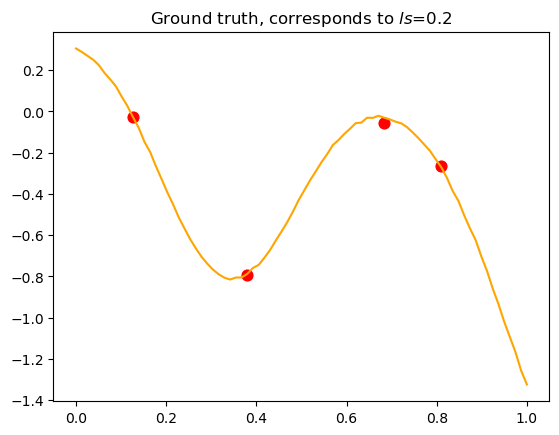

In [7]:
gp_draw = priorcvae_data["gp_draw"]
y_draw = priorcvae_data["y_draw"]
true_ls = priorcvae_data["true_ls"]

# indices of data points
obs_idx = priorcvae_data["obs_idx"]
# x = priorcvae_data["x"]
# y_obs = y_draw[obs_idx]
# x_obs = x[obs_idx]

# plt.figure(figsize=(10, 3))
plt.plot(x, gp_draw, label="ground truth", color="orange")
plt.scatter(x_obs, y_obs, color="red", label="observed data", s=60)
plt.title('Ground truth, corresponds to $ls$=' + str(true_ls))
plt.show()

## Plot Posterior

In [8]:
with open(os.path.join(priorcvae_path, "mcmc_samples.pkl"), "rb") as f:
    mcmc_cvae_samples = pickle.load(f)

with open(os.path.join(priorvae_path, "mcmc_samples.pkl"), "rb") as f:
    mcmc_vae_samples = pickle.load(f)
    
# with open(os.path.join(gp_path, "mcmc_samples.pkl"), "rb") as f:
#     mcmc_gp_samples = pickle.load(f)

In [9]:
gp_samples = jnp.load(gp_path)

In [10]:
gp_samples

NpzFile 'output_tex/mcmc_gp_samples (1).npz' with keys: mcmc_gp_samples_f, mcmc_gp_samples_ls, mcmc_gp_samples_sigma

In [11]:
mcmc_gp_samples = gp_samples["mcmc_gp_samples_f"]

<Figure size 640x480 with 0 Axes>

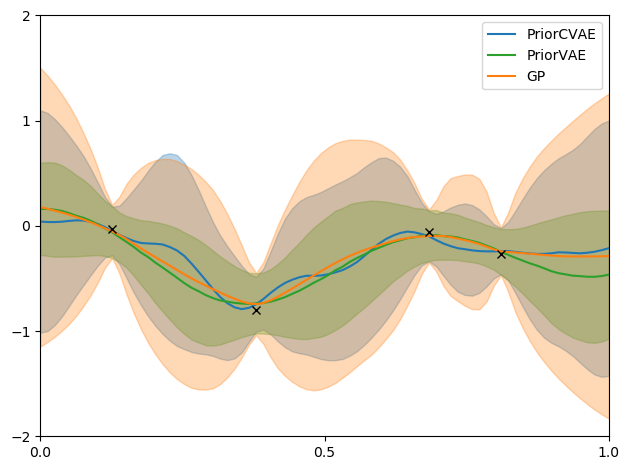

In [12]:
predictions_cvae = mcmc_cvae_samples["f"]
predictions_vae = mcmc_vae_samples["f"]
predictions_gp = mcmc_gp_samples #mcmc_gp_samples["f"]

mean_post_pred_cvae = np.mean(predictions_cvae, axis=0)
std_pred_cvae = np.std(predictions_cvae, axis=0)
# hpdi_post_pred_cvae = hpdi(predictions_cvae, 0.9)
# percentiles_cvae = np.percentile(predictions_cvae, [5.0, 95.0], axis=0)

mean_post_pred_vae = np.mean(predictions_vae, axis=0)
std_pred_vae = np.std(predictions_vae, axis=0)
# hpdi_post_pred_cvae = hpdi(predictions_cvae, 0.9)
# percentiles_vae = np.percentile(predictions_vae, [5.0, 95.0], axis=0)

mean_post_pred_gp = np.mean(predictions_gp, axis=0)
std_pred_gp = np.std(predictions_gp, axis=0)

# percentiles_gp = np.percentile(predictions_gp, [5.0, 95.0], axis=0)

N_lines = 10

plt.clf()
fig, axs = plt.subplots(1, 1)

# plt.plot(x, gp_draw, color="tab:blue")

plt.plot(x, mean_post_pred_cvae, color="tab:blue", label="PriorCVAE")
plt.fill_between(x, mean_post_pred_cvae + 2 * std_pred_cvae, 
                 mean_post_pred_cvae - 2 * std_pred_cvae,
                 alpha=0.3, interpolate=True, color="tab:blue")

plt.plot(x, mean_post_pred_vae, color="tab:green", label="PriorVAE")
plt.fill_between(x, mean_post_pred_vae + 2 * std_pred_vae, 
                 mean_post_pred_vae - 2 * std_pred_vae, 
                 alpha=0.3, interpolate=True, color="tab:green")

plt.plot(x, mean_post_pred_gp, color="tab:orange", label="GP")
plt.fill_between(x, mean_post_pred_gp + 2 * std_pred_gp, 
                 mean_post_pred_gp - 2 * std_pred_gp, 
                 alpha=0.3, interpolate=True, color="tab:orange")

# plt.plot(x, gpr_m, color="black", label="GPFlow")
# plt.fill_between(x, gpr_m + 2 * gpr_s, 
#                  gpr_m - 2 * gpr_s, 
#                  alpha=0.3, interpolate=True, color="black")


plt.plot(x_obs, y_obs, "x", c="black", zorder=999)

# y_min = min(np.concatenate([y_obs, mean_post_pred_cvae, percentiles_cvae[0, :]]))
# y_max = max(np.concatenate([y_obs, mean_post_pred_cvae, percentiles_cvae[1, :]]))

# plt.ylim([y_min, y_max])
plt.xlim([x[0], x[-1]])
plt.yticks([-2, -1, 0, 1, 2])
plt.xticks([0, 0.5, 1.0])
plt.legend()

plt.tight_layout()

if not os.path.exists(os.path.join(output_path, "MCMC")):
    os.makedirs(os.path.join(output_path, "MCMC"))

output_tik_path = os.path.join(output_path, "MCMC", f"MCMC_posterior.tex")
tikzplotlib.save(output_tik_path,
                 figurewidth='\\figurewidth', figureheight='\\figureheight',
                 tex_relative_path_to_data='fig/',
                 figure=fig)

plt.show()

In [14]:
print("Average ESS for all PriorCVAE-GP : " + str(round(priorcvae_data["ess"].item())))
print("Average ESS for all PriorVAE-GP : " + str(round(priorvae_data["ess"].item())))

Average ESS for all PriorCVAE-GP : 6873
Average ESS for all PriorVAE-GP : 25824


In [15]:
print("Time for PriorCVAE-GP : " + str(round(priorcvae_data["t_elapsed"].item())))
print("Time for PriorVAE-GP : " + str(round(priorvae_data["t_elapsed"].item())))

Time for PriorCVAE-GP : 48
Time for PriorVAE-GP : 11


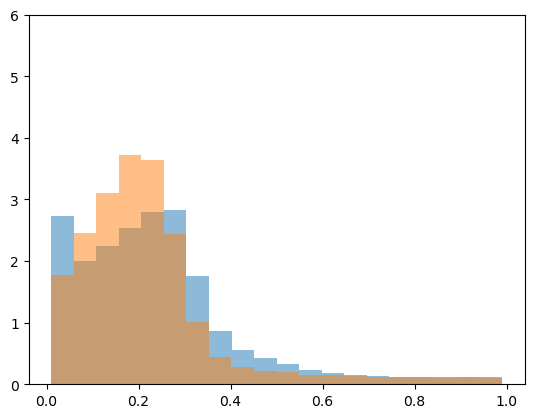

In [16]:
c_samps = mcmc_cvae_samples['c'].reshape((-1,))
gp_samps = gp_samples['mcmc_gp_samples_ls'].reshape((-1,))

plt.hist(c_samps, density=True, label = 'PriorCVAE', bins=20, color='tab:blue', alpha=0.5)
plt.hist(gp_samps, density=True, label = 'GP', bins=20, color='tab:orange', alpha=0.5)

plt.ylim([0, 6])
plt.show()

<Figure size 640x480 with 0 Axes>

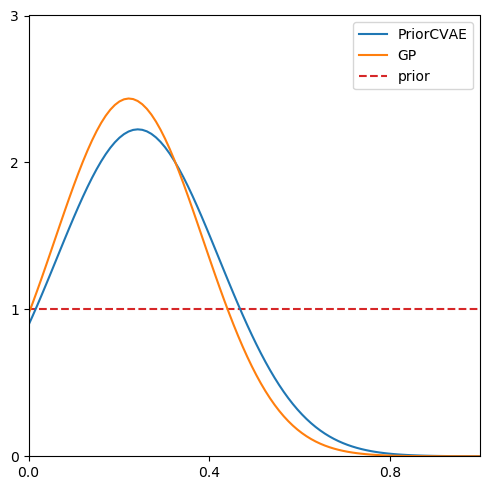

In [17]:
mean = np.mean(c_samps)
sigma = np.std(c_samps)

mean_gp = np.mean(gp_samps)
sigma_gp = np.std(gp_samps)

x_tmp = np.linspace(-0.001, 1, 100)

plt.clf()
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
plt.hlines(1, x_tmp[0], x_tmp[-1], color="tab:red", linestyle="dashed")
plt.plot(x_tmp, scipy.stats.norm.pdf(x_tmp, mean, sigma), c="tab:blue", label="PriorCVAE")
plt.plot(x_tmp, scipy.stats.norm.pdf(x_tmp, mean_gp, sigma_gp), c="tab:orange", label="GP")

plt.xlim([0, 1])
plt.ylim([0, 3])
plt.xticks([0, 0.4, 0.8])
plt.yticks([0, 1, 2, 3])


plt.plot(-1, -1, color="tab:red", linestyle="dashed", label="prior")
plt.legend()
plt.tight_layout()
output_tik_path = os.path.join(output_path, "MCMC", f"MCMC_lengthscale.tex")
tikzplotlib.save(output_tik_path,
                 figurewidth='\\figurewidth', figureheight='\\figureheight',
                 tex_relative_path_to_data='fig/',
                 figure=fig)

plt.show()